In [ ]:
import pandas as pd
import prophet as ph
# Import dataset
df=pd.read_csv('/content/airline_passengers.csv')
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
#Check for null values
df.isnull().sum()

,0
Month,0
Thousands of Passengers,1


In [ ]:
# Drop Null values
dataframe=df.dropna()
dataframe.reset_index(drop=True,inplace=True)
dataframe

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [ ]:
dataframe.isnull().sum()

,0
Month,0
Thousands of Passengers,0


In [ ]:
# Replace column name as ds and y
data=dataframe.rename(columns={'Month':'ds','Thousands of Passengers':'y'})
data

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


<Axes: >

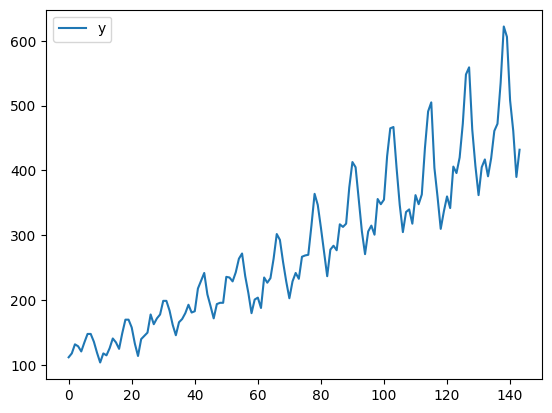

In [ ]:
#Visualize data
data.plot()

# **Additive Model Approach**

In [ ]:
# #Fit Model
prophet = ph.Prophet(seasonality_mode='additive',interval_width=0.95,changepoint_prior_scale=0.9)
# # Adding custom seasonality
prophet.add_seasonality(name='monthly',period=30.5,fourier_order=5)
prophet.add_seasonality(name='quarterly',period=91.25,fourier_order=5)
prophet.add_seasonality(name='yearly',period=365.25,fourier_order=10)
prophet.fit(data)
# # Display params uesd for prophet
prophet.component_modes


INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpecj8d40z/fgg5kbbj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpecj8d40z/2rkqbf3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42995', 'data', 'file=/tmp/tmpecj8d40z/fgg5kbbj.json', 'init=/tmp/tmpecj8d40z/2rkqbf3m.json', 'output', 'file=/tmp/tmpecj8d40z/prophet_model51qy5v55/prophet_model-20250713100733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:07:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:07:33 - cmdstanpy - INFO - Chain [1] do

{'additive': ['monthly',
  'quarterly',
  'yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
import numpy as np
# Transform 'y' into log scale
data['y']=np.log(data['y'])
data

,ds,y
0,1949-01,4.718499
1,1949-02,4.770685
2,1949-03,4.882802
3,1949-04,4.859812
4,1949-05,4.795791
...,...,...
139,1960-08,6.406880
140,1960-09,6.230481
141,1960-10,6.133398
142,1960-11,5.966147


# **Multiplicative Approach**

In [ ]:
# #Fit Model
prophet = ph.Prophet(seasonality_mode='multiplicative',interval_width=0.95,changepoint_prior_scale=0.9)
# # Adding custom seasonality
# # prophet.add_seasonality(name='monthly',period=30.5,fourier_order=5)
prophet.add_seasonality(name='quarterly',period=91.25,fourier_order=5)
# # prophet.add_seasonality(name='yearly',period=365.25,fourier_order=10)
prophet.fit(data)
# # Display params uesd for prophet
prophet.component_modes


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpecj8d40z/70m_y90f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpecj8d40z/z1qto0f1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85792', 'data', 'file=/tmp/tmpecj8d40z/70m_y90f.json', 'init=/tmp/tmpecj8d40z/z1qto0f1.json', 'output', 'file=/tmp/tmpecj8d40z/prophet_modelg8f72l5d/prophet_model-20250713100733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:07:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:07:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'additive': ['additive_terms', 'extra_regressors_additive'],
 'multiplicative': ['quarterly',
  'yearly',
  'multiplicative_terms',
  'extra_regressors_multiplicative',
  'holidays']}

In [ ]:
# # Creates future dataframe
forecast=prophet.make_future_dataframe(periods=12,freq='M')
forecast

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
151,1961-07-31
152,1961-08-31
153,1961-09-30
154,1961-10-31


In [ ]:
# #Predicts 12 Months
prediction=prophet.predict(forecast)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,quarterly,quarterly_lower,quarterly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,4.786378,4.711570,4.800691,4.786378,4.786378,-0.006338,-0.006338,-0.006338,-0.202269,-0.202269,-0.202269,0.195931,0.195931,0.195931,0.0,0.0,0.0,4.756043
1,1949-02-01,4.777759,4.699473,4.790001,4.777759,4.777759,-0.006480,-0.006480,-0.006480,-0.073619,-0.073619,-0.073619,0.067140,0.067140,0.067140,0.0,0.0,0.0,4.746801
2,1949-03-01,4.769974,4.834456,4.920960,4.769974,4.769974,0.022815,0.022815,0.022815,0.325209,0.325209,0.325209,-0.302394,-0.302394,-0.302394,0.0,0.0,0.0,4.878799
3,1949-04-01,4.761355,4.772781,4.862383,4.761355,4.761355,0.011805,0.011805,0.011805,-0.197544,-0.197544,-0.197544,0.209349,0.209349,0.209349,0.0,0.0,0.0,4.817565
4,1949-05-01,4.753014,4.745788,4.833086,4.753014,4.753014,0.007753,0.007753,0.007753,-0.071037,-0.071037,-0.071037,0.078790,0.078790,0.078790,0.0,0.0,0.0,4.789865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1961-07-31,6.297732,6.392938,6.841285,6.088501,6.532343,0.047936,0.047936,0.047936,-0.075812,-0.075812,-0.075812,0.123747,0.123747,0.123747,0.0,0.0,0.0,6.599618
152,1961-08-31,6.308969,6.193204,6.708106,6.065582,6.587449,0.019096,0.019096,0.019096,0.297641,0.297641,0.297641,-0.278545,-0.278545,-0.278545,0.0,0.0,0.0,6.429449
153,1961-09-30,6.319845,5.991747,6.603283,6.037100,6.655697,-0.007368,-0.007368,-0.007368,-0.207669,-0.207669,-0.207669,0.200301,0.200301,0.200301,0.0,0.0,0.0,6.273278
154,1961-10-31,6.331083,5.770796,6.481931,6.000863,6.723082,-0.037727,-0.037727,-0.037727,-0.080609,-0.080609,-0.080609,0.042881,0.042881,0.042881,0.0,0.0,0.0,6.092229


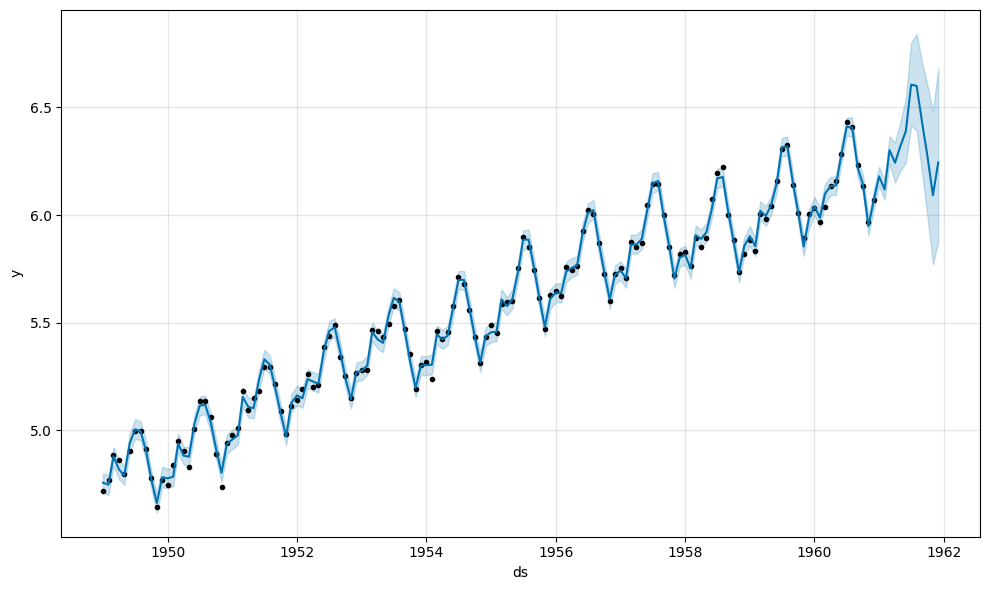

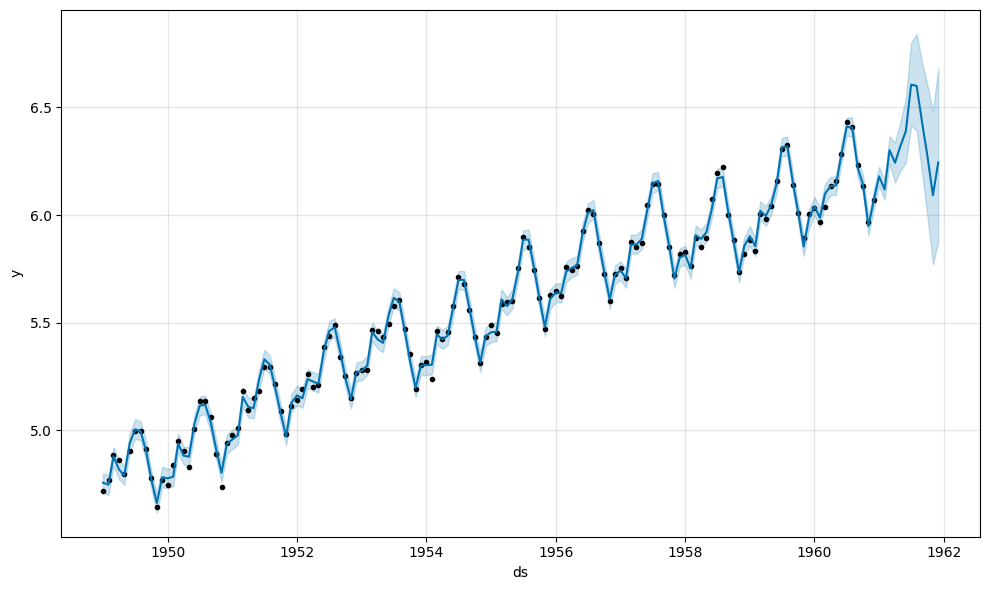

In [ ]:
#Visualize prediction
prophet.plot(prediction)

In [ ]:
from prophet.diagnostics import cross_validation
# Perform cross validation for better accuracy
df_cv=cross_validation(prophet,initial='730 days',horizon='180 days',period='90 days')
df_cv

INFO:prophet:Making 39 forecasts with cutoffs between 1951-01-23 00:00:00 and 1960-06-04 00:00:00


  0%|          | 0/39 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpecj8d40z/g4swp_ur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpecj8d40z/yhy_rx2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73531', 'data', 'file=/tmp/tmpecj8d40z/g4swp_ur.json', 'init=/tmp/tmpecj8d40z/yhy_rx2g.json', 'output', 'file=/tmp/tmpecj8d40z/prophet_model1e4nhi71/prophet_model-20250713100734.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:07:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:08:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpecj8d40z/0e8grpx3.json
DEBUG:cmdstanpy:input tempfi

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,4.751515,4.655851,4.837595,5.010635,1951-01-23
1,1951-03-01,4.512695,4.224556,4.767561,5.181784,1951-01-23
2,1951-04-01,4.824340,4.280261,5.353366,5.093750,1951-01-23
3,1951-05-01,4.838254,3.985075,5.687610,5.147494,1951-01-23
4,1951-06-01,5.180177,3.911261,6.427489,5.181784,1951-01-23
...,...,...,...,...,...,...
227,1960-08-01,6.375754,6.323146,6.422530,6.406880,1960-06-04
228,1960-09-01,6.209726,6.148872,6.273708,6.230481,1960-06-04
229,1960-10-01,6.127187,6.049390,6.200205,6.133398,1960-06-04
230,1960-11-01,5.900476,5.786322,6.011537,5.966147,1960-06-04


In [ ]:
# Evaluate metrics
from prophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,20 days,0.743696,0.862378,0.254643,0.048358,0.009705,0.070611,0.391304
1,21 days,0.744049,0.862583,0.258000,0.048938,0.011601,0.071198,0.391304
2,23 days,0.743603,0.862324,0.254757,0.048313,0.009705,0.070576,0.434783
3,24 days,0.740686,0.860631,0.243805,0.046122,0.009634,0.068326,0.478261
4,25 days,0.740538,0.860545,0.242536,0.045927,0.007172,0.068133,0.536232
...,...,...,...,...,...,...,...,...
125,174 days,11.968577,3.459563,1.018626,0.189148,0.015086,0.100211,0.913043
126,175 days,11.961241,3.458503,1.002179,0.185984,0.011957,0.097180,0.913043
127,177 days,11.954943,3.457592,0.994445,0.184346,0.011957,0.095674,0.913043
128,179 days,11.222614,3.350017,0.856108,0.157562,0.015086,0.078067,0.942029


In [ ]:
# Convert predictions back from log scale to original scale by using exponential
prediction['yhat']=np.exp(prediction['yhat'])
prediction[['ds','yhat']]


,ds,yhat
0,1949-01-01,116.284905
1,1949-02-01,115.215082
2,1949-03-01,131.472672
3,1949-04-01,123.663634
4,1949-05-01,120.285178
...,...,...
151,1961-07-31,734.814791
152,1961-08-31,619.832097
153,1961-09-30,530.212766
154,1961-10-31,442.406428
